In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
df = pd.read_json("./out.json")
df["next"] = df["n"].shift(-1)
df.head()

,i,n,next
0,0,4,6.0
1,1,6,15.0
2,2,15,19.0
3,3,19,34.0
4,4,34,40.0


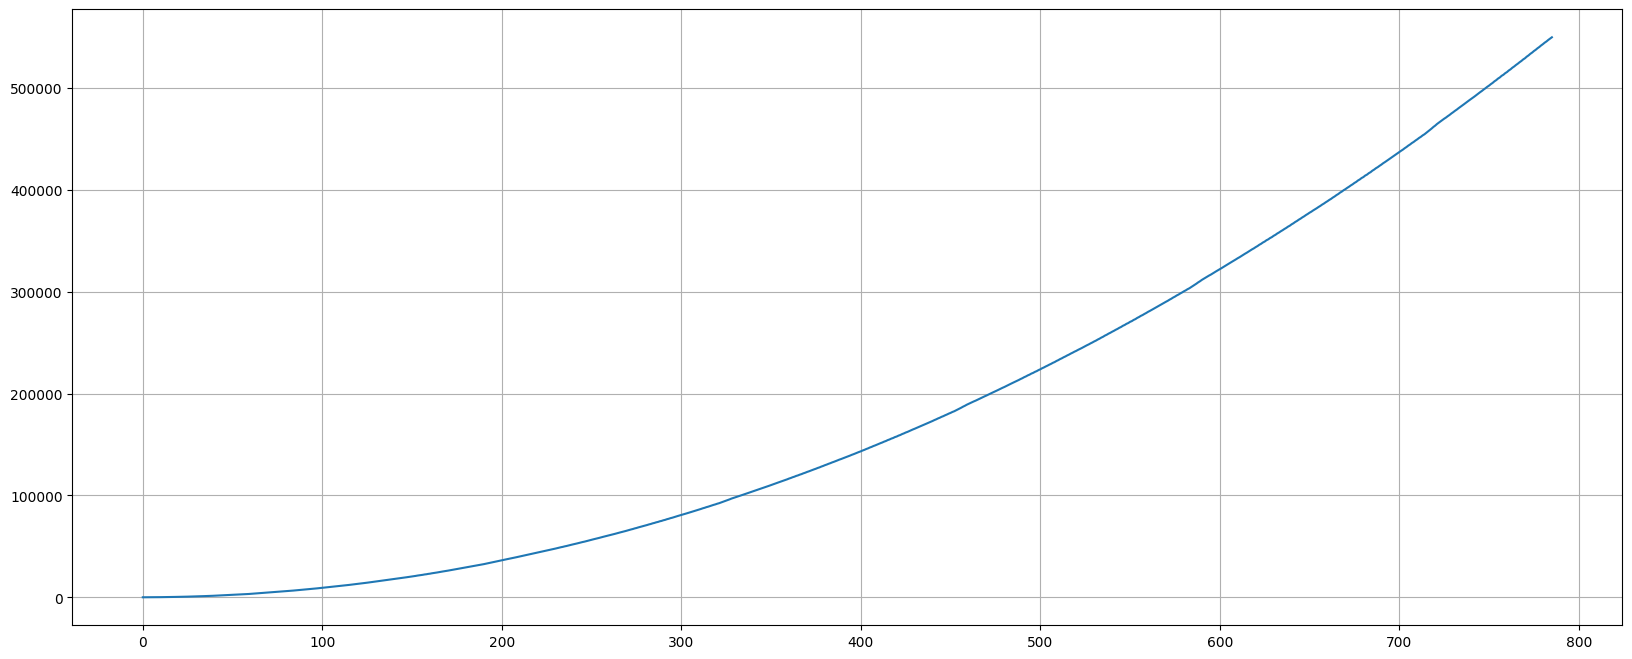

In [26]:
f, ax = plt.subplots(figsize=(20, 8))

ax.plot(df["i"], df["n"])
ax.grid(True)
plt.show()

In [27]:
df.tail()

,i,n,next
781,781,544428,545620.0
782,782,545620,547099.0
783,783,547099,548382.0
784,784,548382,549691.0
785,785,549691,NaN


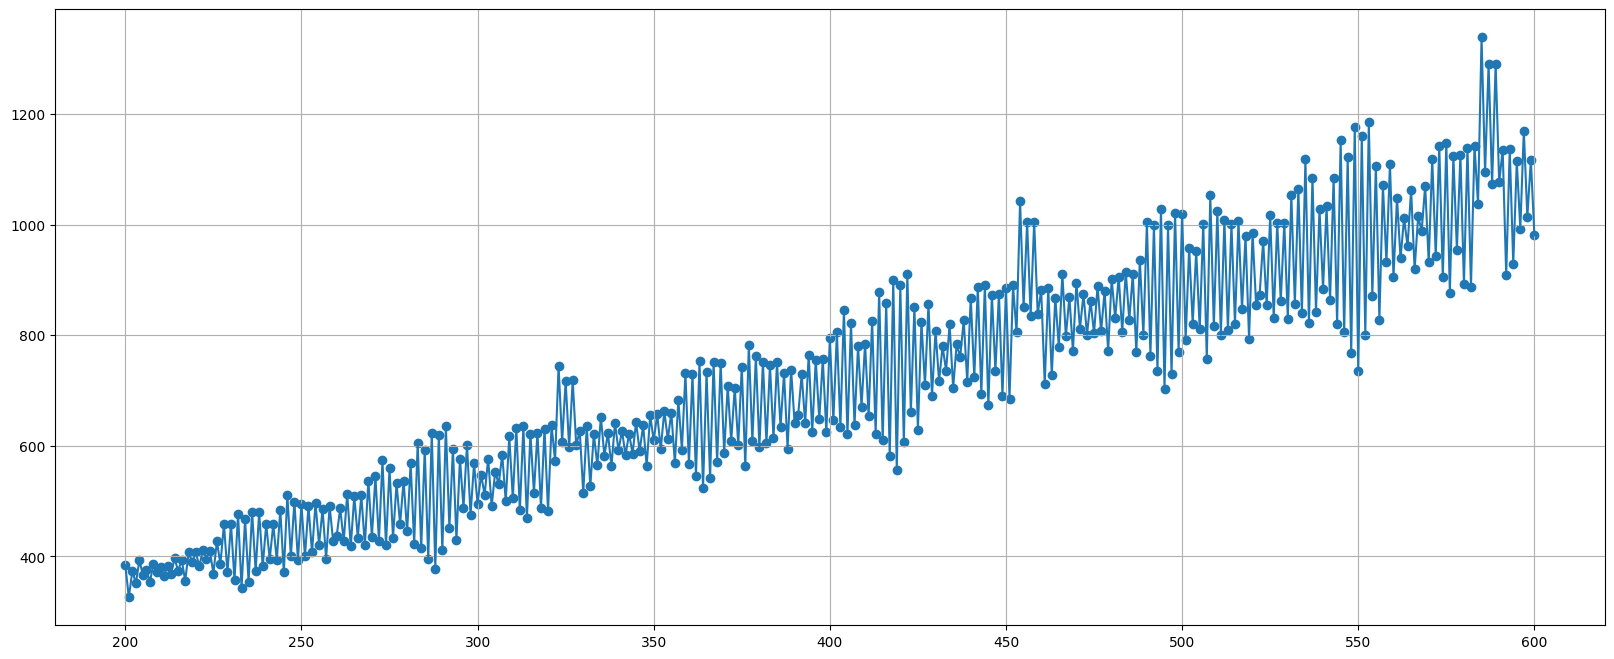

In [79]:
f, ax = plt.subplots(figsize=(20, 8))

_df = df.loc[200:600, :]
ax.plot(_df["i"], _df["next"]-_df["n"])
ax.scatter(_df["i"], _df["next"]-_df["n"])
ax.grid(True)
plt.show()

In [30]:
diffs = (
    df
    .groupby(df.index // 131)
    .apply(lambda g: (g["next"]-g["n"]).sum())
    .to_frame("diffs")
)

diffs["diffs"].shift(-1) - diffs["diffs"]

0    30472.0
1    30472.0
2    30472.0
3    30472.0
4    29017.0
5        NaN
Name: diffs, dtype: float64

In [49]:
(26501365 // 131)*131 + (26501365 % 131)

26501365

In [40]:
# remainder, which would be index-64
26501365 % 131

65

In [51]:
# total number of groups to go to, but minus 1 because we start at the 
# first group already (131+65)
26501365 // 131

202300

In [52]:
elevens = pd.read_json("./elevens.json").transpose()[64].to_frame("n")
elevens

,n
0,3889
1,34504
2,95591
3,187150
4,309181
5,461684


In [53]:
elevens["next_delta"] = elevens["n"].shift(-1) - elevens["n"]
elevens["next_delta_diff"] = elevens["next_delta"].shift(-1) - elevens["next_delta"]
elevens

,n,next_delta,next_delta_diff
0,3889,30615.0,30472.0
1,34504,61087.0,30472.0
2,95591,91559.0,30472.0
3,187150,122031.0,30472.0
4,309181,152503.0,NaN
5,461684,NaN,NaN


In [54]:
def T(i):
    return (i*(i-1))/2


i = 0
value = elevens.loc[i, "n"]
delta = elevens.loc[i, "next_delta"]


n = 3
value + n*delta + T(n)*elevens.loc[i, "next_delta_diff"]

187150.0

In [60]:
n = (26501365 // 131)
value + n*delta + T(n)*elevens.loc[i, "next_delta_diff"]

623540829615589.0

In [59]:
# n = (26501365 // 131) : 623540829615589
# n = (26501365 // 131)-1 : 623534665129846 incorrect
# n = (26501365 // 131)-2 : 623528500674575

In [76]:
def T(i):
    return (i*(i-1))/2


def garden_plots(steps, start = 0, group_size = 131, fp = "./pt2_prime.json"):
    remainder = (steps % group_size)-1
    n = (steps // group_size)
    
    # assumes pt2_prime has a length of group_size
    deltas = (
        pd
        .read_json(fp)
        .transpose()
        [remainder]
        .to_frame("n")
    )
    
    deltas["next_delta"] = deltas["n"].shift(-1) - deltas["n"]
    deltas["next_delta_diff"] = deltas["next_delta"].shift(-1) - deltas["next_delta"]
    
    
    value = elevens.loc[start, "n"]
    delta = elevens.loc[start, "next_delta"]
    

    return value + (n-start)*delta + T((n-start))*deltas.loc[start, "next_delta_diff"]

In [77]:
garden_plots(steps=26501365, start=0, group_size=131)

623540829615589.0